# Macro Finance - Homework 1: Asset Class Comparison
- Matheus Raka Pradnnyatama
- matheusraka@uchicago.edu

The code is made with the help of OpenAI's ChatGPT.com

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import gmean

as_of_date = pd.to_datetime('2000-01-01')
annual_factor = 252 # 252 trading days

# US 10Y Government Bond (UST)

Components:
- Total Return: <br>
SPBDU1BT Index = S&P U.S. Treasury Bond Current 10-Year Total Return Index <br>
Source: Bloomberg

- Income Return (Use Yield on US 10Y UST): <br>
DGS10: Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis <br>
Source: https://fred.stlouisfed.org/series/DGS10

For Geometric Mean calculation: <br>
Because some of the returns are negative, a work-around is: add 1 to each rate, compute gmean, then subtract 1 <br>
Example: mean_tot_return_ust_daily = gmean(1 + data) - 1

In [2]:
# 10Y UST Total Return Index
# SPBDU1BT Index = S&P U.S. Treasury Bond Current 10-Year Total Return Index (from BBG)

filepath_rawdata = f'./data/ust_10y_total_return.xlsx'
df_ust_10yr_tot_return = pd.read_excel(filepath_rawdata, sheet_name='Data')
df_ust_10yr_tot_return = df_ust_10yr_tot_return.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'}).dropna() # Drop Missing Data
df_ust_10yr_tot_return = df_ust_10yr_tot_return.drop(columns={'PX_LAST'})
df_ust_10yr_tot_return = df_ust_10yr_tot_return[df_ust_10yr_tot_return['Date'] >= as_of_date]
display(df_ust_10yr_tot_return.head())

,Date,Total_Return_Index
1,2000-01-03,195.9394
2,2000-01-04,196.9687
3,2000-01-05,195.4437
4,2000-01-06,196.1615
5,2000-01-07,196.9443


In [3]:
# Total Return
 
total_return_index = df_ust_10yr_tot_return.set_index('Date')

df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Total_Return'})
df_return = df_return.reset_index()
df_ust_return = df_return.copy()

data = df_return['Total_Return']

mean_tot_return_ust = (gmean(1 + data) - 1) * annual_factor
vol_tot_return_ust = data.std() * np.sqrt(annual_factor)

print(f"Annualized Geometric Mean for the Total Return of 10Y UST: {mean_tot_return_ust:.4%}")
print(f"Annualized Volatility for the Total Return of 10Y UST: {vol_tot_return_ust:.4%}")
display(df_return.head())

Annualized Geometric Mean for the Total Return of 10Y UST: 3.8408%
Annualized Volatility for the Total Return of 10Y UST: 7.7178%


,Date,Total_Return
0,2000-01-04,0.005253
1,2000-01-05,-0.007742
2,2000-01-06,0.003673
3,2000-01-07,0.003991
4,2000-01-10,-0.003631


In [4]:
# Yield on US 10-Year Government Bond (to be used as Income Return)
# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis (DGS10)
# The numbers are annualized numbers

filepath_rawdata = f'./data/DGS10.xlsx'
df_UST_10yr = pd.read_excel(filepath_rawdata, sheet_name='Daily')
df_UST_10yr = df_UST_10yr.rename(columns={'observation_date': 'Date', 'DGS10': 'UST_10Y_Yield'}).dropna() # Drop Missing Data
display(df_UST_10yr.head())

,Date,UST_10Y_Yield
0,2000-01-03,6.58
1,2000-01-04,6.49
2,2000-01-05,6.62
3,2000-01-06,6.57
4,2000-01-07,6.52


In [ ]:
# Merge total return and yield data
df_combined = df_return.merge(df_UST_10yr, on='Date')
df_combined['UST_10Y_Yield'] = df_combined['UST_10Y_Yield'] / 100  # convert % to decimal

# Estimate daily income return (carry), convert annual yield to daily yield
df_combined['Income_Return'] = df_combined['UST_10Y_Yield'] / annual_factor

# Capital (Price) Return = Total Return - Income Return
df_combined['Capital_Return'] = df_combined['Total_Return'] - df_combined['Income_Return']
display(df_combined.head())

,Date,Total_Return,UST_10Y_Yield,Income_Return,Capital_Return
0,2000-01-04,0.005253,0.0649,0.000258,0.004996
1,2000-01-05,-0.007742,0.0662,0.000263,-0.008005
2,2000-01-06,0.003673,0.0657,0.000261,0.003412
3,2000-01-07,0.003991,0.0652,0.000259,0.003732
4,2000-01-10,-0.003631,0.0657,0.000261,-0.003892


In [6]:
# Volatility of Returns
vol_income_return_ust = (df_combined['Income_Return']).std() * np.sqrt(annual_factor)
vol_capital_return_ust = (df_combined['Capital_Return']).std() * np.sqrt(annual_factor)

vol_list = []

vol_list.append({
        'Total Return for 10Y UST': vol_tot_return_ust *100,
        'Income Return for 10Y UST': vol_income_return_ust *100,
        'Capital Return for 10Y UST': vol_capital_return_ust *100,
    })

df_vol = pd.DataFrame(vol_list)
df_vol = df_vol.T # Transpose
df_vol.columns = ['Annualized Volatility (%)']  # Rename columns
display(df_vol)

,Annualized Volatility (%)
Total Return for 10Y UST,7.717764
Income Return for 10Y UST,0.082110
Capital Return for 10Y UST,7.731066


# Public Equity Market
- Use SPX Index as a measure for US Public Equity Market

Components:
- Total Return: SPX Total Return Index <br>
Source: Bloomberg

- Capital Return (Measure change in Price): SPX Index <br>
Source: Bloomberg

In [7]:
# SPX Total Return Index

filepath_rawdata = f'./data/spx_tot_return.xlsx'
spx_tot_return = pd.read_excel(filepath_rawdata, sheet_name = 'Data')
spx_tot_return = spx_tot_return.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'}).dropna() # Drop Missing Data
spx_tot_return = spx_tot_return.drop(columns={'PX_BID'})
display(spx_tot_return.head())
display(spx_tot_return.tail())

,Date,Total_Return_Index
0,1999-12-31,1469.2500
1,2000-01-03,1455.2312
2,2000-01-04,1399.4780
3,2000-01-05,1402.2910
4,2000-01-06,1403.9109


,Date,Total_Return_Index
6363,2025-04-21,8248.8923
6364,2025-04-22,8456.2887
6365,2025-04-23,8597.3529
6366,2025-04-24,8771.5274
6367,2025-04-25,8836.2517


In [8]:
# SPX Total Return
 
total_return_index = spx_tot_return.set_index('Date')

df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Total_Return'})
df_return = df_return.reset_index()
df_spx_tot_return = df_return.copy()

data = df_return['Total_Return']

mean_tot_return_spx = (gmean(1 + data) - 1) * annual_factor
vol_tot_return_spx = data.std() * np.sqrt(annual_factor)

print(f"Annualized Geometric Mean for the Total Return of SPX Index: {mean_tot_return_spx:.4%}")
print(f"Annualized Volatility for the Total Return of SPX Index: {vol_tot_return_spx:.4%}")
display(df_return.head())

Annualized Geometric Mean for the Total Return of SPX Index: 7.1019%
Annualized Volatility for the Total Return of SPX Index: 19.5335%


,Date,Total_Return
0,2000-01-03,-0.009541
1,2000-01-04,-0.038312
2,2000-01-05,0.002010
3,2000-01-06,0.001155
4,2000-01-07,0.027091


In [9]:
# SPX Index (to be used for Price (Capital) Return)

filepath_rawdata = f'./data/spx_index.xlsx'
spx_capital_return = pd.read_excel(filepath_rawdata, sheet_name = 'Data')
spx_capital_return = spx_capital_return.rename(columns={'PX_LAST': 'Capital_Return_Index'}).dropna() # Drop Missing Data
spx_capital_return = spx_capital_return.drop(columns={'PX_BID'})
display(spx_capital_return.head())
display(spx_capital_return.tail())

,Date,Capital_Return_Index
0,1999-12-31,1469.25
1,2000-01-03,1455.22
2,2000-01-04,1399.42
3,2000-01-05,1402.11
4,2000-01-06,1403.45


,Date,Capital_Return_Index
6363,2025-04-21,5158.20
6364,2025-04-22,5287.76
6365,2025-04-23,5375.86
6366,2025-04-24,5484.77
6367,2025-04-25,5525.21


In [10]:
# SPX Capital Return 
 
capital_return_index = spx_capital_return.set_index('Date')

df_capital_return = capital_return_index.pct_change().dropna()
df_capital_return = df_capital_return.rename(columns={'Capital_Return_Index': 'Capital_Return'})
df_capital_return = df_capital_return.reset_index()

display(df_capital_return.head())

,Date,Capital_Return
0,2000-01-03,-0.009549
1,2000-01-04,-0.038345
2,2000-01-05,0.001922
3,2000-01-06,0.000956
4,2000-01-07,0.027090


In [11]:
# Merge total return and capital return
df_combined = df_return.merge(df_capital_return, on='Date')

# Income Return = Total Return - Capital (Price) Return
df_combined['Income_Return'] = df_combined['Total_Return'] - df_combined['Capital_Return']
display(df_combined.head())

,Date,Total_Return,Capital_Return,Income_Return
0,2000-01-03,-0.009541,-0.009549,7.622937e-06
1,2000-01-04,-0.038312,-0.038345,3.245495e-05
2,2000-01-05,0.002010,0.001922,8.781025e-05
3,2000-01-06,0.001155,0.000956,1.994786e-04
4,2000-01-07,0.027091,0.027090,2.949203e-07


In [12]:
# Volatility of Returns
vol_income_return_spx = (df_combined['Income_Return']).std() * np.sqrt(annual_factor)
vol_capital_return_spx = (df_combined['Capital_Return']).std() * np.sqrt(annual_factor)

vol_list = []

vol_list.append({
        'Total Return for Public Equity Market': vol_tot_return_ust *100,
        'Income Return for Public Equity Market': vol_income_return_spx *100,
        'Capital Return for Public Equity Market': vol_capital_return_spx *100,
    })

df_vol = pd.DataFrame(vol_list)
df_vol = df_vol.T # Transpose
df_vol.columns = ['Annualized Volatility (%)']  # Rename columns
display(df_vol)

,Annualized Volatility (%)
Total Return for Public Equity Market,7.717764
Income Return for Public Equity Market,0.147762
Capital Return for Public Equity Market,19.531878


# 10Y European Government Bond
- For measure: Bloomberg Germany 7-10Y Government Bond Total Return Index (BEGRG4 Index)
- The closest maturity available to mimic the 10Y German Bund
- Source: Bloomberg
- Description: https://assets.bwbx.io/documents/users/iqjWHBFdfxIU/rtRmfQxVR8qI/v0

In [13]:
# 10Y German Government Bund Total Return Index (grabbed directly from Bloomberg)

filepath_rawdata = f'./data/bbg_german_7_10.xlsx'
df_bund_10y = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet')
df_bund_10y = df_bund_10y.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'}).dropna() # Drop Missing Data
df_bund_10y = df_bund_10y.drop(columns={'PX_LAST'})
display(df_bund_10y.head())
display(df_bund_10y.tail())

,Date,Total_Return_Index
0,1999-12-31,192.7770
1,2000-01-03,191.4691
2,2000-01-04,191.2460
3,2000-01-05,190.9671
4,2000-01-06,190.5546


,Date,Total_Return_Index
6557,2025-04-21,478.8324
6558,2025-04-22,479.8005
6559,2025-04-23,477.4135
6560,2025-04-24,479.6976
6561,2025-04-25,478.6642


In [14]:
# 10Y German Government Bund Total Return
 
total_return_index = df_bund_10y.set_index('Date')

df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Total_Return'})
df_return = df_return.reset_index()
df_bund_tot_return = df_return.copy()

data = df_return['Total_Return']

mean_tot_return_bund = (gmean(1 + data) - 1) * annual_factor
vol_tot_return_bund = data.std() * np.sqrt(annual_factor)

print(f"Annualized Geometric Mean for the Total Return of 10Y German Bund: {mean_tot_return_bund:.4%}")
print(f"Annualized Volatility for the Total Return of 10Y German Bund: {vol_tot_return_bund:.4%}")
display(df_return.head())

Annualized Geometric Mean for the Total Return of 10Y German Bund: 3.4934%
Annualized Volatility for the Total Return of 10Y German Bund: 5.2187%


,Date,Total_Return
0,2000-01-03,-0.006785
1,2000-01-04,-0.001165
2,2000-01-05,-0.001458
3,2000-01-06,-0.002160
4,2000-01-07,0.007274


# High-Yield Credit Market

- To measure: Bloomberg US Corporate High Yield Total Return Index Value Unhedged USD (LF98TRUU Index).
- The Bloomberg US Corporate High Yield Bond Index measures the USD-denominated, high yield, fixed-rate corporate bond market.
- Securities are classified as high yield if the middle rating of Moody's, Fitch and S&P is Ba1/BB+/BB+ or below. 
- Source: Bloomberg
- Description: https://www.bloomberg.com/professional/products/indices/quote/LF98TRUU:IND

In [15]:
# High Yield Corporate Bond Total Return Index (grabbed directly from Bloomberg)

filepath_rawdata = f'./data/bbg_us_hy.xlsx'
df_hy_bond = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet')
df_hy_bond = df_hy_bond.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'}).dropna() # Drop Missing Data
df_hy_bond = df_hy_bond.drop(columns={'PX_LAST'})
display(df_hy_bond.head())
display(df_hy_bond.tail())

,Date,Total_Return_Index
0,1999-12-31,549.30
1,2000-01-03,548.29
2,2000-01-04,547.66
3,2000-01-05,546.83
4,2000-01-06,547.01


,Date,Total_Return_Index
6345,2025-04-21,2668.87
6346,2025-04-22,2679.29
6347,2025-04-23,2697.44
6348,2025-04-24,2705.13
6349,2025-04-25,2712.91


In [16]:
# High Yield Corporate Bond Total Return
 
total_return_index = df_hy_bond.set_index('Date')

df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Total_Return'})
df_return = df_return.reset_index()
df_hy_tot_return = df_return.copy()

data = df_return['Total_Return']

mean_tot_return_HY = (gmean(1 + data) - 1) * annual_factor
vol_tot_return_HY = data.std() * np.sqrt(annual_factor)

print(f"Annualized Geometric Mean for the Total Return of US HY Corporate Bonds: {mean_tot_return_HY:.4%}")
print(f"Annualized Volatility for the Total Return of US HY Corporate Bonds: {vol_tot_return_HY:.4%}")
display(df_return.head())

Annualized Geometric Mean for the Total Return of US HY Corporate Bonds: 6.3400%
Annualized Volatility for the Total Return of US HY Corporate Bonds: 5.1161%


,Date,Total_Return
0,2000-01-03,-0.001839
1,2000-01-04,-0.001149
2,2000-01-05,-0.001516
3,2000-01-06,0.000329
4,2000-01-07,-0.000512


# Global Commodities Market
- To measure: S&P Goldman Sachs Commodity Index (GSCI) --> SPGSCI Index
- Source: Bloomberg

The SPGSCI Index: 
- A benchmark commodities index that tracks the performance of the global commodities market.
- Comprised of 24 exchange-traded futures contracts that cover physical commodities spanning five sectors.
- Tracks energy (oil and natural gas ~54%), grains (wheat, corn, soybeans), livestock, agriculture (coffee, sugar, cocoa), industrial and precious metals. 


In [17]:
# SPGSCI Index: (Used as Total Return Index)

filepath_rawdata = f'./data/sp_gsci.xlsx'
gsci_tot_return = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet')
gsci_tot_return = gsci_tot_return.rename(columns={'PX_LAST': 'Total_Return_Index'}).dropna()
gsci_tot_return = gsci_tot_return.drop(columns={'CHG_PCT_1D'})
display(gsci_tot_return.head())
display(gsci_tot_return.tail())

,Date,Total_Return_Index
0,1999-12-31,194.5372
1,2000-01-03,194.2237
2,2000-01-04,192.3673
3,2000-01-05,190.5185
4,2000-01-06,190.4214


,Date,Total_Return_Index
6369,2025-04-17,538.5269
6370,2025-04-21,531.9703
6371,2025-04-22,538.1811
6372,2025-04-23,532.8139
6373,2025-04-24,536.4912


In [18]:
# GSCI Total Return
 
total_return_index = gsci_tot_return.set_index('Date')

df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Total_Return'})
df_return = df_return.reset_index()
df_gsci_tot_return = df_return.copy()

data = df_return['Total_Return']

mean_tot_return_gsci = (gmean(1 + data) - 1) * annual_factor
vol_tot_return_gsci = data.std() * np.sqrt(annual_factor)

print(f"Annualized Geometric Mean for the Total Return of Global Commodities: {mean_tot_return_gsci:.4%}")
print(f"Annualized Volatility for the Total Return of Global Commodities: {vol_tot_return_gsci:.4%}")
display(df_return.head())

Annualized Geometric Mean for the Total Return of Global Commodities: 4.0115%
Annualized Volatility for the Total Return of Global Commodities: 23.2653%


,Date,Total_Return
0,2000-01-03,-0.001612
1,2000-01-04,-0.009558
2,2000-01-05,-0.009611
3,2000-01-06,-0.000510
4,2000-01-07,-0.009813


# Question 1

,Annualized Geometric Mean Total Return (%)
Gov Bond US 10Y,3.840821
Gov Bond Germany 10Y,3.493387
Public Equity,7.101926
High Yield Credit,6.340022
Global Commodities,4.011547


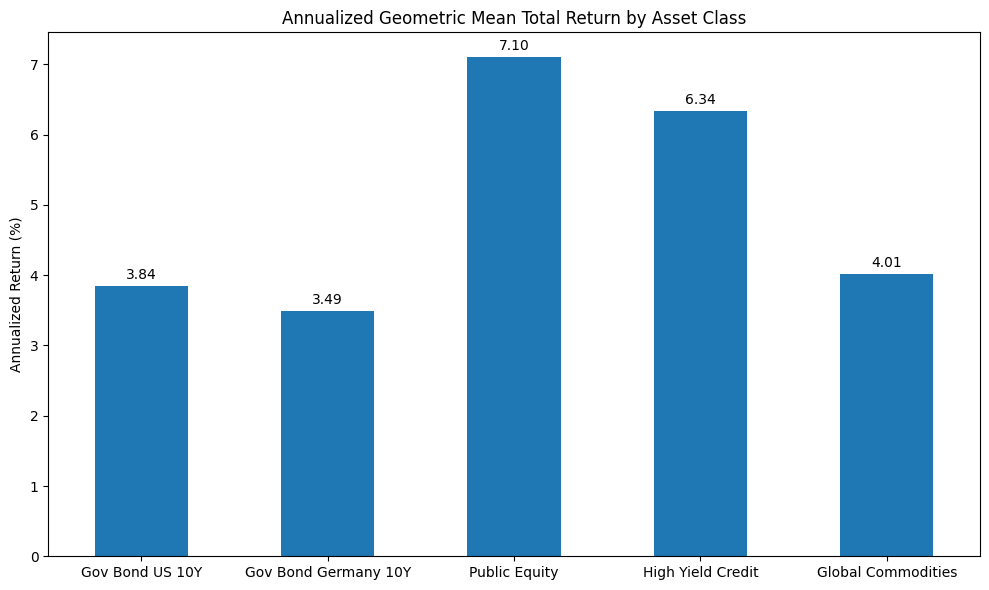

In [19]:
mean_list = []

mean_list.append({
        'Gov Bond US 10Y': mean_tot_return_ust *100,
        'Gov Bond Germany 10Y': mean_tot_return_bund *100,
        'Public Equity': mean_tot_return_spx *100,
        'High Yield Credit': mean_tot_return_HY *100,
        'Global Commodities': mean_tot_return_gsci *100,
    })

df_mean = pd.DataFrame(mean_list)
df_mean = df_mean.T # Transpose
df_mean.columns = ['Annualized Geometric Mean Total Return (%)']  # Rename columns
display(df_mean)

# Create a bar chart
ax = df_mean.plot(kind='bar', legend=False, figsize=(10,6))

plt.title('Annualized Geometric Mean Total Return by Asset Class')
plt.ylabel('Annualized Return (%)')
plt.xticks(rotation=0) # Set x-axis labels to be horizontal 
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

# Question 2

,Annualized Volatility (%)
Gov Bond US 10Y,7.717764
Gov Bond Germany 10Y,5.218671
Public Equity,19.533477
High Yield Credit,5.116099
Global Commodities,23.265273


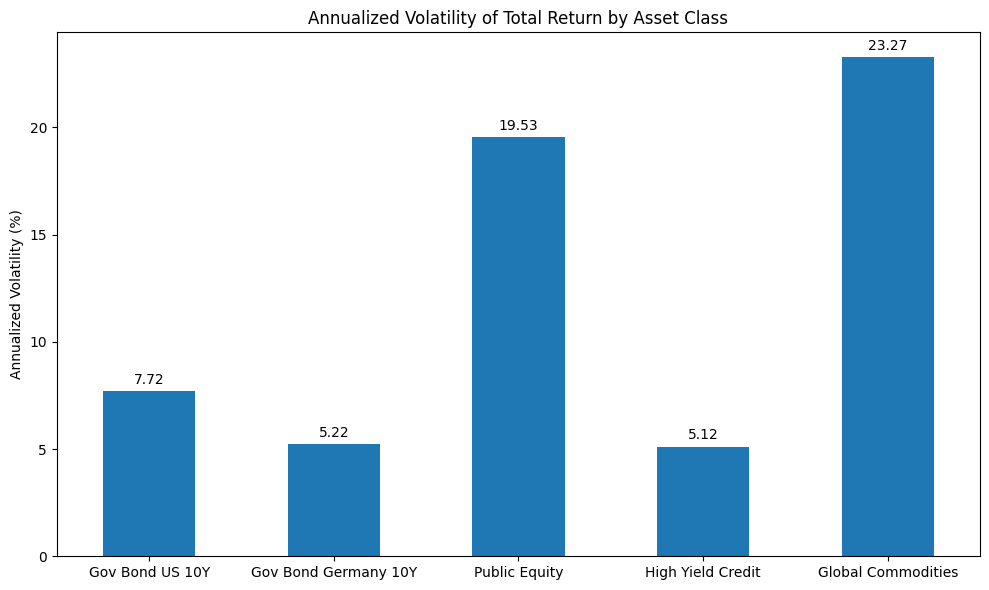

In [20]:
vol_list = []

vol_list.append({
        'Gov Bond US 10Y': vol_tot_return_ust *100,
        'Gov Bond Germany 10Y': vol_tot_return_bund *100,
        'Public Equity': vol_tot_return_spx *100,
        'High Yield Credit': vol_tot_return_HY *100,
        'Global Commodities': vol_tot_return_gsci *100,
    })

df_vol = pd.DataFrame(vol_list)
df_vol = df_vol.T # Transpose
df_vol.columns = ['Annualized Volatility (%)']  # Rename columns
display(df_vol)

# Create a bar chart
ax = df_vol.plot(kind='bar', legend=False, figsize=(10,6))

plt.title('Annualized Volatility of Total Return by Asset Class')
plt.ylabel('Annualized Volatility (%)')
plt.xticks(rotation=0) # Set x-axis labels to be horizontal 
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

,Annualized Geometric Mean Total Return (%),Annualized Volatility (%),Sharpe_Ratio_Total_Return
Asset_Class,,,
Gov Bond US 10Y,3.840821,7.717764,0.497660
Gov Bond Germany 10Y,3.493387,5.218671,0.669402
Public Equity,7.101926,19.533477,0.363577
High Yield Credit,6.340022,5.116099,1.239230
Global Commodities,4.011547,23.265273,0.172426


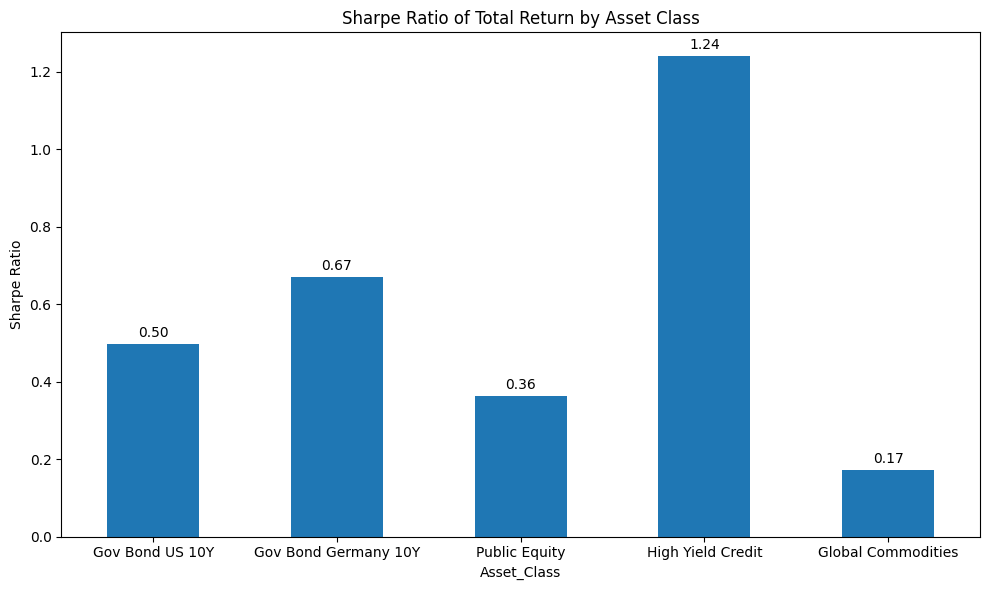

In [21]:
df_tot_return = pd.merge(df_mean, df_vol, on=df_mean.index, how='inner')
df_tot_return = df_tot_return.rename(columns={'key_0': 'Asset_Class'}).set_index('Asset_Class')
df_tot_return['Sharpe_Ratio_Total_Return'] = df_tot_return['Annualized Geometric Mean Total Return (%)'] / df_tot_return['Annualized Volatility (%)'] 
display(df_tot_return)

# Create a bar chart
ax = df_tot_return['Sharpe_Ratio_Total_Return'].plot(kind='bar', legend=False, figsize=(10,6))

plt.title('Sharpe Ratio of Total Return by Asset Class')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=0) # Set x-axis labels to be horizontal 
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

# Question 5

Question 5: To determine whether to put more emphasis on asset allocation across asset classes vs security selection withing asset classes:
1. Treat the UST 10Y Yield (daily rate) as the risk-free rate
2. Compute the excess return for each asset class (Total Return - Risk-Free Rate)
3. Compute the Sharpe Ratio for each asset class
4. Put all excess return in a dataframe
5. Apply MV Optimization method to the excess returns, to allocate weights to each asset class --> Creating a Tangency Portfolio
6. Compute the Sharpe Ratio for the Tangency Portfolio
7. Compare the Sharpe Ratio for the Tangency Portfolio vs Average Sharpe Ratio of Each Asset Class

Caveat: <br>
Because I'm using the UST 10Y Yield as the risk-free rate, I'm only considering US asset classes: US Government Bond, US Public Equity Market, and US HY Corporate Credit Market. This is to provide consistency for excess return and sharpe ratio calculation. We cannot use UST 10Y as the risk-free rate to consider whether it's appropriate to invest in German Bund or not.

## Part 1: Portfolio of Single Asset Class

In [22]:
df_risk_free = df_UST_10yr.copy()
# Convert % to real numbers, and convert annual to daily
df_risk_free['risk_free_rate'] = (df_UST_10yr['UST_10Y_Yield']/100) / annual_factor
df_risk_free.head()

,Date,UST_10Y_Yield,risk_free_rate
0,2000-01-03,6.58,0.000261
1,2000-01-04,6.49,0.000258
2,2000-01-05,6.62,0.000263
3,2000-01-06,6.57,0.000261
4,2000-01-07,6.52,0.000259


In [23]:
# UST 10Y
df_ust_return['Excess_Return_UST'] = df_ust_return['Total_Return'] - df_risk_free['risk_free_rate']

# Make a new dataframe for excess return
df_excess_return = df_ust_return.copy()
df_excess_return = df_excess_return.drop(columns={'Total_Return'})
df_excess_return['Excess_Return_SPX'] = df_spx_tot_return['Total_Return'] - df_risk_free['risk_free_rate']
df_excess_return['Excess_Return_HY'] = df_hy_tot_return['Total_Return'] - df_risk_free['risk_free_rate']
df_excess_return['Excess_Return_Commodities'] = df_gsci_tot_return['Total_Return'] - df_risk_free['risk_free_rate']
df_excess_return = df_excess_return.set_index('Date')
display(df_excess_return.head())
display(df_excess_return.tail())

,Excess_Return_UST,Excess_Return_SPX,Excess_Return_HY,Excess_Return_Commodities
Date,,,,
2000-01-04,0.004992,-0.009803,-0.002100,-0.001873
2000-01-05,-0.008000,-0.038570,-0.001407,-0.009816
2000-01-06,0.003410,0.001747,-0.001778,-0.009873
2000-01-07,0.003730,0.000894,0.000068,-0.000770
2000-01-10,-0.003890,0.026832,-0.000771,-0.010072


,Excess_Return_UST,Excess_Return_SPX,Excess_Return_HY,Excess_Return_Commodities
Date,,,,
2025-04-21,-0.006206,0.000667,0.003048,0.005875
2025-04-22,0.001349,0.017467,-0.000187,-0.004607
2025-04-23,0.001462,0.001428,-0.003725,0.001728
2025-04-24,0.005261,-0.011341,0.003721,0.007427
2025-04-25,0.003906,-0.003490,0.006588,-0.003377


In [24]:
def summary_statistics_annualized(returns, annual_factor = 12):
    """This functions returns the summary statistics for the input total/excess returns passed
    into the function"""
    
    summary_statistics = pd.DataFrame(index=returns.columns)
    summary_statistics['Mean'] = returns.mean() * annual_factor
    summary_statistics['Vol'] = returns.std() * np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = (returns.mean() / returns.std()) * np.sqrt(annual_factor)
    
    return summary_statistics

summary_stats_individual_asset = summary_statistics_annualized(df_excess_return, annual_factor = 252)
display(summary_stats_individual_asset)

sharpe_mean_individual_asset = summary_stats_individual_asset['Sharpe'].mean()
print(f"The Average Sharpe Ratio for a Portfolio Consisting of One Asset Class: {sharpe_mean_individual_asset:.2f}")

,Mean,Vol,Sharpe
Excess_Return_UST,0.005114,0.076849,0.066540
Excess_Return_SPX,0.058664,0.194745,0.301233
Excess_Return_HY,0.031716,0.051039,0.621407
Excess_Return_Commodities,0.044656,0.233162,0.191521


The Average Sharpe Ratio for a Portfolio Consisting of One Asset Class: 0.30


## Part 2: MV Optimization Method for Tangency Portfolio

In [25]:
def tangency_weights(returns, cov_mat = 1, annual_factor = 252):
    if cov_mat == 1:
        cov_inv = np.linalg.inv((returns.cov()*annual_factor))
    else:
        cov = returns.cov()
        covmat_diag = np.diag(np.diag(cov))
        covmat = cov_mat * cov + (1 - cov_mat) * covmat_diag
        cov_inv = np.linalg.inv((covmat * annual_factor))
    
    ones = np.ones(returns.columns.shape)
    mu = returns.mean() * annual_factor
    scaling = 1 / (np.transpose(ones) @ cov_inv @ mu)
    tangent_return = scaling * (cov_inv @ mu)
    tangency_wts = pd.DataFrame(index=returns.columns, data=tangent_return, columns=['Tangent Weights'])

    return tangency_wts

In [26]:
# Inputs
returns = df_excess_return
summary_column_sharpe = summary_stats_individual_asset['Sharpe']

w_t = tangency_weights(returns, cov_mat = 1, annual_factor=252)
mv_frontier = w_t.merge(summary_column_sharpe, on=w_t.index).rename(columns={'key_0':'assets'}).set_index('assets')
display(mv_frontier)

,Tangent Weights,Sharpe
assets,,
Excess_Return_UST,0.052216,0.066540
Excess_Return_SPX,0.098473,0.301233
Excess_Return_HY,0.796631,0.621407
Excess_Return_Commodities,0.052679,0.191521


In [27]:
# Inputs
returns = df_excess_return

summary_stats_tangency_port = summary_statistics_annualized(returns @ w_t, annual_factor=252)
sharpe_tangency = summary_stats_tangency_port['Sharpe'].mean()
display(summary_stats_tangency_port)

print(f"The Sharpe Ratio for the Tangency Portfolio (using MV Optimization): {sharpe_tangency:.2f}")

summary_stats_individual_asset = summary_statistics_annualized(df_excess_return, annual_factor = 252)
display(summary_stats_individual_asset)

sharpe_mean_individual_asset = summary_stats_individual_asset['Sharpe'].mean()
print(f"The Average Sharpe Ratio for a Portfolio Consisting of One Asset Class: {sharpe_mean_individual_asset:.2f}")

,Mean,Vol,Sharpe
Tangent Weights,0.033662,0.047343,0.711034


The Sharpe Ratio for the Tangency Portfolio (using MV Optimization): 0.71


,Mean,Vol,Sharpe
Excess_Return_UST,0.005114,0.076849,0.066540
Excess_Return_SPX,0.058664,0.194745,0.301233
Excess_Return_HY,0.031716,0.051039,0.621407
Excess_Return_Commodities,0.044656,0.233162,0.191521


The Average Sharpe Ratio for a Portfolio Consisting of One Asset Class: 0.30


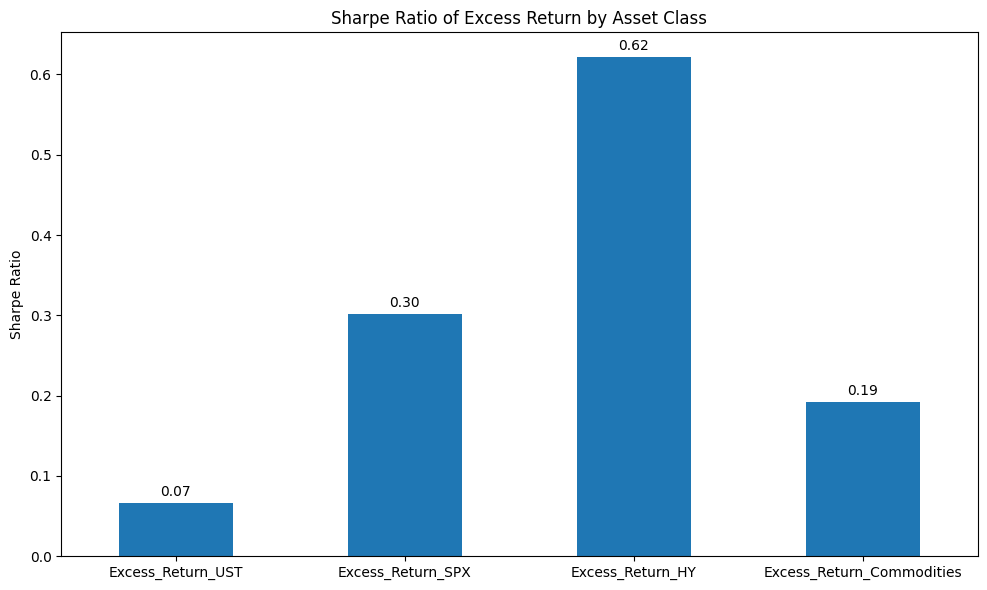

In [28]:
# Create a bar chart
ax = summary_stats_individual_asset['Sharpe'].plot(kind='bar', legend=False, figsize=(10,6))

plt.title('Sharpe Ratio of Excess Return by Asset Class')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=0) # Set x-axis labels to be horizontal 
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()